<a href="https://www.bigdatauniversity.com"><img src="https://ibm.box.com/shared/static/qo20b88v1hbjztubt06609ovs85q8fau.png" width="400px" align="center"></a>

<br><br>

<h1 align="center"><font size="5">Project: Character Modeling Solution Template</font></h1>

<h3><strong>This is a solution template, please only use the output of the cells of the questions in this notebook as a reference when grading your peer's assignment. Your the output on peer's project may differ from the output in this notebook but they might still be correct as long as they satisfy the criteria in the grading rubric.</strong></h3>
<br>
<font size="3"><strong>In this notebook you will use TensorFlow to create a Recurrent Neural Network, to predict the next character in a string. You need to train your network using a CPU and using a GPU and benchmark the result to see which which device You have to write your code in empty cells in this notebook to make it complete, and then submit the notebook for peer-review.</strong></font>

<h2>Table of Contents</h2>
<ol>
    <li><a href="#question_1">Question 1: Complete the code to run it on CPU</a></li>
    <li><a href="#question_2">Question 2: Complete the code to run it on GPU</a></li>
    <li><a href="#question_3">Question 3: Compare the results</a></li>
</ol>    
<p></p>
</div>
<br>
<hr>

<a id="cpu_vs_gpu"></a>
<h2>Train your model using CPU and GPU</h2>
We can train our model through feeding batches. You should be able to complete the following cells and submit it for review.

<a id="question_1"></a>
<h2>Question 1: Complete the code to run it on CPU</h2>

In [29]:
avg_batch_running_duration_CPU=[]
tf.reset_default_graph()
with tf.variable_scope("rnn_CPU"):
    model = LSTMModel(device='/cpu:0')
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for e in range(num_epochs): # num_epochs is 20 for test, but should be higher
        sess.run(tf.assign(model.lr, learning_rate * (decay_rate ** e)))
        ## write your code bellow to reset the batch pointer in data_loader. you can use reset_batch_pointer()
        ##
        ##

        state = sess.run(model.initial_state) # model initialization
        batch_running_duration_CPU = []
        for b in range(data_loader.num_batches): #for each batch
            start = time.time()
            ## write your code to define your x and y. You should use next_batch() from data_loader
            ## e.g. x,y =
            ##

            feed = {model.input_data: x, model.targets: y, model.initial_state:state}           
            ## write your code to train the model
            ## fe.g.: train_loss, state, _ = 
            ##

            end = time.time()
            ## write your code to store the duration of runing each batch in a list (end - start)
            ##
            ##
            batch_running_duration_CPU.append( end - start)
            
        print("{}/{} (epoch {}), train_loss = {:.3f}, time/batch = {:.3f}" \
                .format(e * data_loader.num_batches + b, num_epochs * data_loader.num_batches, e, train_loss, end - start))
        avg_batch_running_duration_CPU.append(sum(batch_running_duration_CPU) / float(len(batch_running_duration_CPU)))
        
        # Please uncomment the following block of the code so the grader can see the sample of prediction
        with tf.variable_scope("rnn_CPU", reuse=True):
            sample_model = LSTMModel(sample=True)
            print ('----------------------------------')
            print ('SAMPLE GENERATED TEXT:')
            print (sample_model.sample(sess, data_loader.chars , data_loader.vocab, num=150, prime='The ', sampling_type=1))
            print ('----------------------------------')

173/3480 (epoch 0), train_loss = 2.049, time/batch = 0.049
----------------------------------
SAMPLE GENERATED TEXT:
The purde aud mavr to bestly sour arontery.

LICENEY:
Sod nomy srowe apseed.
'Tsy magr, with if hif the fon it Jot he rrolours,
And bult the, for ath have
----------------------------------
347/3480 (epoch 1), train_loss = 1.840, time/batch = 0.051
----------------------------------
SAMPLE GENERATED TEXT:
The all now me.

BLACUSIUS:
Why Rriof and weer, she restere cloned.

KING WINks Have she is a greeand word to you but sup you, what ove reatonts.

VETCURI
----------------------------------
521/3480 (epoch 2), train_loss = 1.734, time/batch = 0.062
----------------------------------
SAMPLE GENERATED TEXT:
The mother, is promtation you k, vear on Rome to the muster.

VOLKENCE:
Of ewhen, loves for dere's deast thus appy of me.
Conouses and forself me dost?

T
----------------------------------
695/3480 (epoch 3), train_loss = 1.671, time/batch = 0.062
--------------------

<a id="question_2"></a>
<h2>Question 2: Complete the code to run it on GPU</h2>
Now, create the same network with GPU, and calculate the time/batch for running each batch

In [30]:
avg_batch_running_duration_GPU=[]
tf.reset_default_graph()
with tf.variable_scope("rnn_GPU"):
    model = LSTMModel(device='/gpu:0')
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for e in range(num_epochs): # num_epochs is 20 for test, but should be higher
        sess.run(tf.assign(model.lr, learning_rate * (decay_rate ** e)))
        ## write your code bellow to reset the batch pointer in data_loader. you can use reset_batch_pointer()
        ##
        ##

        state = sess.run(model.initial_state) # model initialization
        batch_running_duration_GPU = []
        for b in range(data_loader.num_batches): #for each batch
            start = time.time()
            ## write your code to define your x and y. You should use next_batch() from data_loader
            ## e.g. x,y =
            ##

            feed = {model.input_data: x, model.targets: y, model.initial_state:state}
            ## write your code to train the model
            ## fe.g.: train_loss, state, _ = 
            ##

            end = time.time()
            ## write your code to store the duration of runing each batch in a list (end - start)
            ##
            ##
            
        print("{}/{} (epoch {}), train_loss = {:.3f}, time/batch = {:.3f}" \
                .format(e * data_loader.num_batches + b, num_epochs * data_loader.num_batches, e, train_loss, end - start))
        avg_batch_running_duration_GPU.append(sum(batch_running_duration_GPU) / float(len(batch_running_duration_GPU)))
        
        # Please uncomment the following block of the code so the grader can see the sample of prediction
        with tf.variable_scope("rnn_GPU", reuse=True):
            sample_model = LSTMModel(sample=True)
            print ('----------------------------------')
            print ('SAMPLE GENERATED TEXT:')
            print (sample_model.sample(sess, data_loader.chars , data_loader.vocab, num=150, prime='The ', sampling_type=1))
            print ('----------------------------------')


173/3480 (epoch 0), train_loss = 2.047, time/batch = 0.020
----------------------------------
SAMPLE GENERATED TEXT:
The Dosteny, sicher and tay his lond
My fory fr,
Bundurk
Yut toud htace.

ELNENBUMANB:
whigh I soskikedy thelise mads the kighind yoe sager
Tamy on thas, 
----------------------------------
347/3480 (epoch 1), train_loss = 1.839, time/batch = 0.019
----------------------------------
SAMPLE GENERATED TEXT:
The waips!

GLathy fecame'd waddy or wey, be vellon depore-s
Whorselvent, preen.
Yebleds, for is now live farourt:
Sire, and woth, with Ge, wnow on the ki
----------------------------------
521/3480 (epoch 2), train_loss = 1.730, time/batch = 0.020
----------------------------------
SAMPLE GENERATED TEXT:
The how'll me nogh be sor no I cave nath.

ION A me in though.

CLAYAL:
God centy thre, wnot, I waich then for art
What' servace shake 'tille on' gook one
----------------------------------
695/3480 (epoch 3), train_loss = 1.666, time/batch = 0.019
--------------------

<a id="question_3"></a>
<h2>Question 3: Compare the results</h2>
Finally, using a graph, show the speed of training (batch/time) for the model running on GPU and CPU:

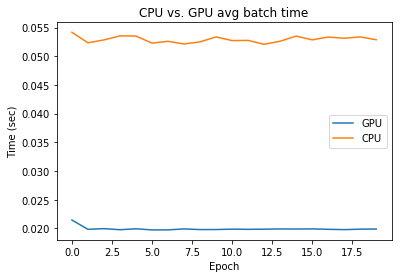

In [31]:
## Write your code here


<h2>Do you want to use GPU in production?</h2>

<p>Running deep learning programs usually needs a high performance platform. PowerAI speeds up deep learning and AI. Built on IBM's Power Systems, PowerAI is a scalable software platform that accelerates deep learning and AI with blazing performance for individual users or enterprises. The <a href="https://cocl.us/ML0122EN_IBMCLOUD_PowerAI">PowerAI platform on IBM Cloud</a> supports popular machine learning libraries and dependencies including TensorFlow, Caffe, PyTorch, and Theano.</p>

<h3>Thanks for completing this lesson!</h3>



<h4>Author:  <a href="https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a>,   <a href="https://www.linkedin.com/in/yi-leng-yao-84451275/">Yi leng Yao</a></h4>
<p><a href="https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a>, PhD is a Data Scientist in IBM with a track record of developing enterprise level applications that substantially increases clients’ ability to turn data into actionable knowledge. He is a researcher in data mining field and expert in developing advanced analytic methods like machine learning and statistical modelling on large datasets.</p>
</article>

<hr>

<p>Copyright &copy; 2018 <a href="https://cocl.us/DX0108EN_CC">Cognitive Class</a>. This notebook and its source code are released under the terms of the <a href="https://bigdatauniversity.com/mit-license/">MIT License</a>.</p>